In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import ml_utils.save_io as io
import numpy as np
import os
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
def get_df(models, model_names=None):
    """
    Takes a list of model directories and extracts the training information from them.
    
    models: list of directory paths
        each directory must contain a csv named "model_data.csv"
    model_names: list of str or None
        the corresponding names of the models if different than the end point folder name
    """
    df = pd.DataFrame()
    if model_names is None:
        model_names = [m.split("/")[-1] for m in models]
    for model_path,model_name in zip(models,model_names):
        df_path = os.path.join(model_path,"model_data.csv")
        if not os.path.exists(df_path): 
            print("Could not find", df_path)
            continue
        new_df = pd.read_csv(df_path,sep="!")
        new_df['Model Name'] = model_name
        df = df.append(new_df,sort=True)
    return df

In [3]:
main_path = os.path.expanduser("~/src/locgame/training_scripts/")

In [4]:
exp_folder = "seedtrials/"
model_folders = io.get_model_folders(os.path.join(main_path,exp_folder),True)
model_folders

['/home/grantsrb/src/locgame/training_scripts/seedtrials/seedtrials_0_seed4_torch_seed0_numpy_seed0',
 '/home/grantsrb/src/locgame/training_scripts/seedtrials/seedtrials_1_seed0_torch_seed4_numpy_seed4']

In [5]:
models = []
idxs = list(range(len(model_folders)))
# idxs = [0,2]
for idx in idxs:
    models.append(model_folders[idx])
models

['/home/grantsrb/src/locgame/training_scripts/seedtrials/seedtrials_0_seed4_torch_seed0_numpy_seed0',
 '/home/grantsrb/src/locgame/training_scripts/seedtrials/seedtrials_1_seed0_torch_seed4_numpy_seed4']

In [6]:
exp_folder = "tightwindowRNN/"
model_folders = io.get_model_folders(os.path.join(main_path,exp_folder),True)
model_folders

['/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_0_seed2_egoCentered1_absoluteCoords0',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_1_seed0_egoCentered1_absoluteCoords0',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_2_seed0_egoCentered0_absoluteCoords1',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_3_seed1_egoCentered1_absoluteCoords0',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_4_seed1_egoCentered0_absoluteCoords1',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_5_seed3_egoCentered1_absoluteCoords0',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_6_seed2_egoCentered0_absoluteCoords1',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_7_seed3_egoCentered0_absoluteCoords1',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_8_se

In [7]:
idxs = list(range(len(model_folders)))
# idxs = [0,1,4]
for idx in idxs:
    models.append(model_folders[idx])
models

['/home/grantsrb/src/locgame/training_scripts/seedtrials/seedtrials_0_seed4_torch_seed0_numpy_seed0',
 '/home/grantsrb/src/locgame/training_scripts/seedtrials/seedtrials_1_seed0_torch_seed4_numpy_seed4',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_0_seed2_egoCentered1_absoluteCoords0',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_1_seed0_egoCentered1_absoluteCoords0',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_2_seed0_egoCentered0_absoluteCoords1',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_3_seed1_egoCentered1_absoluteCoords0',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_4_seed1_egoCentered0_absoluteCoords1',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_5_seed3_egoCentered1_absoluteCoords0',
 '/home/grantsrb/src/locgame/training_scripts/tightwindowRNN/tightwindowRNN_6_seed2_egoCentered0_absoluteC

In [9]:
# model_names = ["AlloRel1", "AlloAbs1", "EgoRel1", "EgoAbs1",
#                 "AlloRel2", "AlloAbs2", "EgoRel2"]
# model_names = ["EgoRel1", "AlloAbs1", "EgoRel2", "AlloAbs2", "EgoRel3", "AlloAbs3"]
model_names = None

In [10]:
df = get_df(models,model_names)
df['seed'] = df.apply(lambda x: getattr(x,"Model Name").split("seed")[-1].split("_")[0], axis=1)
df

,Model Name,absoluteCoords,egoCentered,epoch,model_class,model_type,obj_recog,randomizeObjs,restrictCamera,seed,smoothMovement,specGoalObjs,train_loss,train_obj_acc,train_obj_loss,train_pred_loss,train_rew,train_rew_loss,val_rew
0,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,0,RNNLocator,EgoRelative,False,0,0,0,0,0,2.048604,0.0,0.0,0.492758,-1.836278,16.051219,-0.216833
1,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,1,RNNLocator,EgoRelative,False,0,0,0,0,0,0.094042,0.0,0.0,0.099954,-0.200137,0.040835,-0.189947
2,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,2,RNNLocator,EgoRelative,False,0,0,0,0,0,0.092794,0.0,0.0,0.098178,-0.196910,0.044342,-0.120716
3,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,3,RNNLocator,EgoRelative,False,0,0,0,0,0,0.073289,0.0,0.0,0.078514,-0.157180,0.026259,-0.522700
4,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,4,RNNLocator,EgoRelative,False,0,0,0,0,0,0.073992,0.0,0.0,0.078483,-0.157261,0.033573,-0.134665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37,tightwindowRNN_11_seed5_egoCentered0_absoluteC...,1,0,37,RNNLocator,AlloAbsolute,False,0,0,5,0,0,0.039224,0.0,0.0,0.042788,-0.085576,0.007148,-0.117910
38,tightwindowRNN_11_seed5_egoCentered0_absoluteC...,1,0,38,RNNLocator,AlloAbsolute,False,0,0,5,0,0,0.042027,0.0,0.0,0.045803,-0.091606,0.008042,-0.085569
39,tightwindowRNN_11_seed5_egoCentered0_absoluteC...,1,0,39,RNNLocator,AlloAbsolute,False,0,0,5,0,0,0.041865,0.0,0.0,0.045711,-0.091422,0.007250,-0.110639
40,tightwindowRNN_11_seed5_egoCentered0_absoluteC...,1,0,40,RNNLocator,AlloAbsolute,False,0,0,5,0,0,0.042597,0.0,0.0,0.046433,-0.092865,0.008074,-0.081066


In [11]:
df['Model Type'] = df["model_type"]
df['val_loss'] = -df['val_rew']

In [21]:
# names = df.apply(lambda x: "seed"+str(x.seed) +"_randomized"+ str(x.randomizeObjs)+"_ego"+str(x.egoCentered),axis=1)
# df['name'] = names

# idx = ((df['egoCentered']>=1)&(df['absoluteCoords']<=0))|((df['egoCentered']<=0)&(df['absoluteCoords']>=1))
# idx = (df['egoCentered']>=1)&(df['absoluteCoords']<=0)
idx = ((df['seed']=="0")|(df['seed']=="4"))&(df['egoCentered']>=1)
filtered_df = df.loc[idx]
filtered_df

,Model Name,absoluteCoords,egoCentered,epoch,model_class,model_type,obj_recog,randomizeObjs,restrictCamera,seed,smoothMovement,specGoalObjs,train_loss,train_obj_acc,train_obj_loss,train_pred_loss,train_rew,train_rew_loss,val_rew,Model Type,val_loss
0,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,0,RNNLocator,EgoRelative,False,0,0,0,0,0,2.048604,0.0,0.0,0.492758,-1.836278,16.051219,-0.216833,EgoRelative,0.216833
1,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,1,RNNLocator,EgoRelative,False,0,0,0,0,0,0.094042,0.0,0.0,0.099954,-0.200137,0.040835,-0.189947,EgoRelative,0.189947
2,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,2,RNNLocator,EgoRelative,False,0,0,0,0,0,0.092794,0.0,0.0,0.098178,-0.196910,0.044342,-0.120716,EgoRelative,0.120716
3,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,3,RNNLocator,EgoRelative,False,0,0,0,0,0,0.073289,0.0,0.0,0.078514,-0.157180,0.026259,-0.522700,EgoRelative,0.522700
4,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,4,RNNLocator,EgoRelative,False,0,0,0,0,0,0.073992,0.0,0.0,0.078483,-0.157261,0.033573,-0.134665,EgoRelative,0.134665
5,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,5,RNNLocator,EgoRelative,False,0,0,0,0,0,0.053610,0.0,0.0,0.057903,-0.115811,0.014975,-0.075230,EgoRelative,0.075230
6,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,6,RNNLocator,EgoRelative,False,0,0,0,0,0,0.048730,0.0,0.0,0.052195,-0.104460,0.017544,-0.119544,EgoRelative,0.119544
7,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,7,RNNLocator,EgoRelative,False,0,0,0,0,0,0.041537,0.0,0.0,0.044978,-0.089957,0.010561,-0.093303,EgoRelative,0.093303
8,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,8,RNNLocator,EgoRelative,False,0,0,0,0,0,0.037079,0.0,0.0,0.040353,-0.080706,0.007618,-0.079919,EgoRelative,0.079919
9,seedtrials_0_seed4_torch_seed0_numpy_seed0,0,1,9,RNNLocator,EgoRelative,False,0,0,0,0,0,0.035702,0.0,0.0,0.038822,-0.077658,0.007615,-0.099835,EgoRelative,0.099835


In [22]:
y = "train_pred_loss"
hue = "Model Name"
style = None

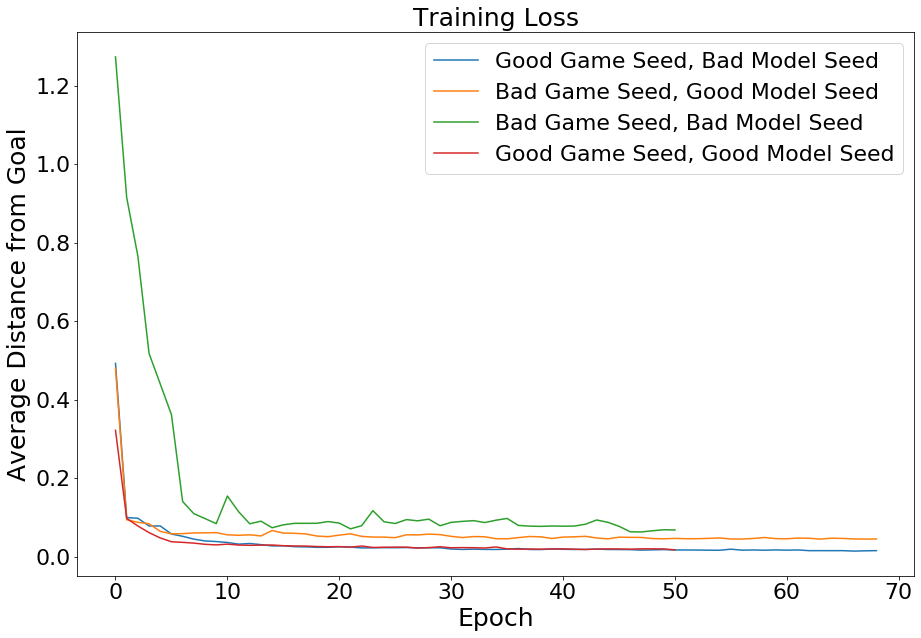

In [27]:
fig = plt.figure(figsize=(15,10))
sns.lineplot(x="epoch", 
             y=y,
             hue=hue,
             style=style,
             data=filtered_df)
# plt.ylim([0,.75])
# plt.xlim([-1,125])
plt.title("Training Loss",fontsize=25)
plt.ylabel("Average Distance from Goal",fontsize=25)
plt.xlabel("Epoch", fontsize=25)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)
plt.legend(["Good Game Seed, Bad Model Seed", "Bad Game Seed, Good Model Seed", "Bad Game Seed, Bad Model Seed", "Good Game Seed, Good Model Seed"],fontsize=22)

(array([-0.3 , -0.25, -0.2 , -0.15, -0.1 , -0.05,  0.  ]),
 <a list of 7 Text yticklabel objects>)

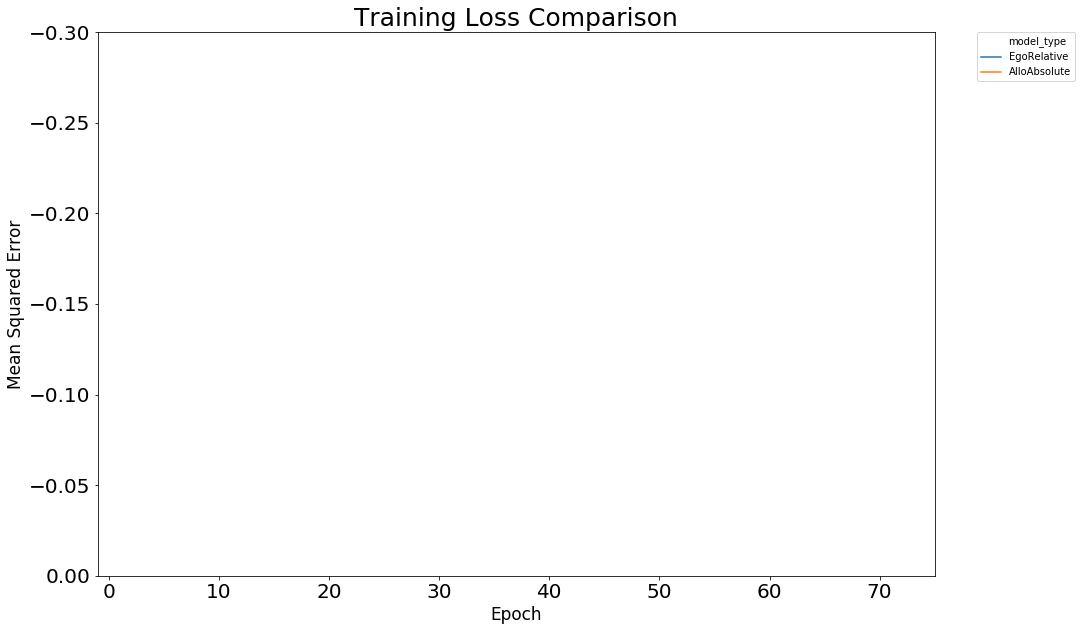

In [103]:
fig = plt.figure(figsize=(15,10))
sns.lineplot(x="epoch", 
             y=y,
             hue=hue,
             style=style,
             data=filtered_df)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.ylim([0,.2])
plt.ylim([0,-.3])
plt.xlim([-1,75])
plt.title("Training Loss Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=17)
plt.xlabel("Epoch", fontsize=17)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.legend(fontsize=20)

## Seed Deviations

This is a way to compare differences by seed

In [78]:
seed_avgs_df = df.groupby(["seed", "epoch"])[y].mean().reset_index()
seed_avgs_df['seed_avg'] = seed_avgs_df[y]
del seed_avgs_df[y]

In [79]:
seed_df = df.merge(seed_avgs_df,how="left",on=["seed","epoch"])
seed_df

,Model Name,absoluteCoords,egoCentered,epoch,model_class,model_type,obj_recog,randomizeObjs,restrictCamera,seed,...,train_loss,train_obj_acc,train_obj_loss,train_pred_loss,train_rew,train_rew_loss,val_rew,Model Type,val_loss,seed_avg
0,tightwindowRNN_0_seed2_egoCentered1_absoluteCo...,0,1,0,RNNLocator,EgoRelative,False,0,0,2,...,1.192875,0.0,0.0,0.423030,-1.334064,8.121484,-0.266142,EgoRelative,0.266142,0.336753
1,tightwindowRNN_0_seed2_egoCentered1_absoluteCo...,0,1,1,RNNLocator,EgoRelative,False,0,0,2,...,0.105277,0.0,0.0,0.111290,-0.222986,0.051160,-0.210384,EgoRelative,0.210384,0.094889
2,tightwindowRNN_0_seed2_egoCentered1_absoluteCo...,0,1,2,RNNLocator,EgoRelative,False,0,0,2,...,0.086528,0.0,0.0,0.093561,-0.187189,0.023232,-0.093294,EgoRelative,0.093294,0.084631
3,tightwindowRNN_0_seed2_egoCentered1_absoluteCo...,0,1,3,RNNLocator,EgoRelative,False,0,0,2,...,0.080621,0.0,0.0,0.086993,-0.173985,0.023281,-0.351253,EgoRelative,0.351253,0.079050
4,tightwindowRNN_0_seed2_egoCentered1_absoluteCo...,0,1,4,RNNLocator,EgoRelative,False,0,0,2,...,0.073370,0.0,0.0,0.079278,-0.158558,0.020191,-0.136416,EgoRelative,0.136416,0.073975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,tightwindowRNN_11_seed5_egoCentered0_absoluteC...,1,0,37,RNNLocator,AlloAbsolute,False,0,0,5,...,0.039224,0.0,0.0,0.042788,-0.085576,0.007148,-0.117910,AlloAbsolute,0.117910,0.053228
593,tightwindowRNN_11_seed5_egoCentered0_absoluteC...,1,0,38,RNNLocator,AlloAbsolute,False,0,0,5,...,0.042027,0.0,0.0,0.045803,-0.091606,0.008042,-0.085569,AlloAbsolute,0.085569,0.055867
594,tightwindowRNN_11_seed5_egoCentered0_absoluteC...,1,0,39,RNNLocator,AlloAbsolute,False,0,0,5,...,0.041865,0.0,0.0,0.045711,-0.091422,0.007250,-0.110639,AlloAbsolute,0.110639,0.055892
595,tightwindowRNN_11_seed5_egoCentered0_absoluteC...,1,0,40,RNNLocator,AlloAbsolute,False,0,0,5,...,0.042597,0.0,0.0,0.046433,-0.092865,0.008074,-0.081066,AlloAbsolute,0.081066,0.054755


In [80]:
seed_df['seed_deviation'] = seed_df[y]-seed_df['seed_avg']

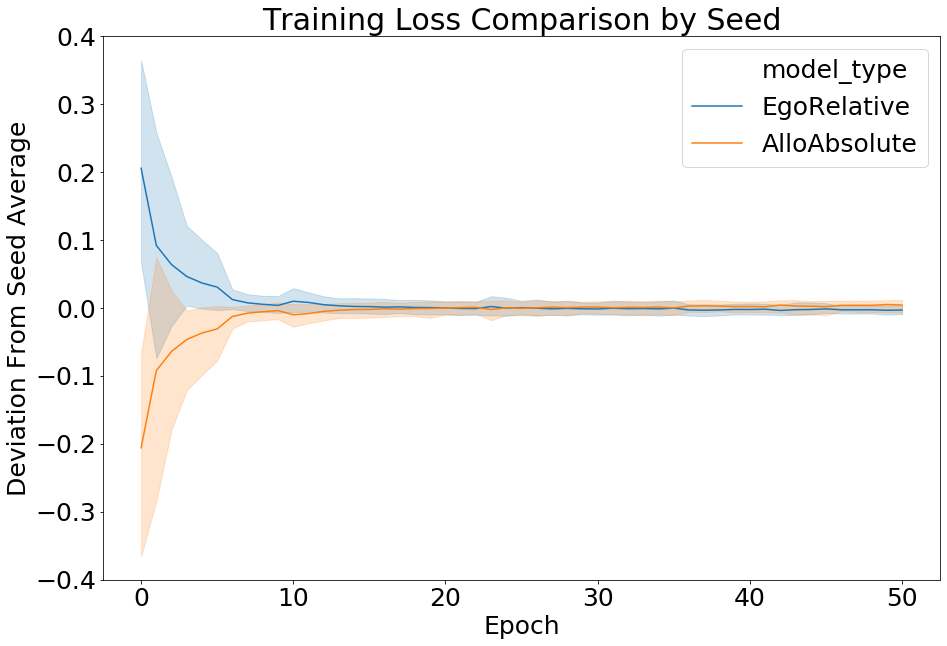

In [84]:
fig = plt.figure(figsize=(15,10))
sns.lineplot(x="epoch", 
             y="seed_deviation",
             hue=hue,
             data=seed_df,
             )
plt.ylim([-.4,.4])
# plt.xlim([-1,125])
plt.title("Training Loss Comparison by Seed",fontsize=30)
plt.ylabel("Deviation From Seed Average",fontsize=25)
plt.xlabel("Epoch", fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.legend(fontsize=25)

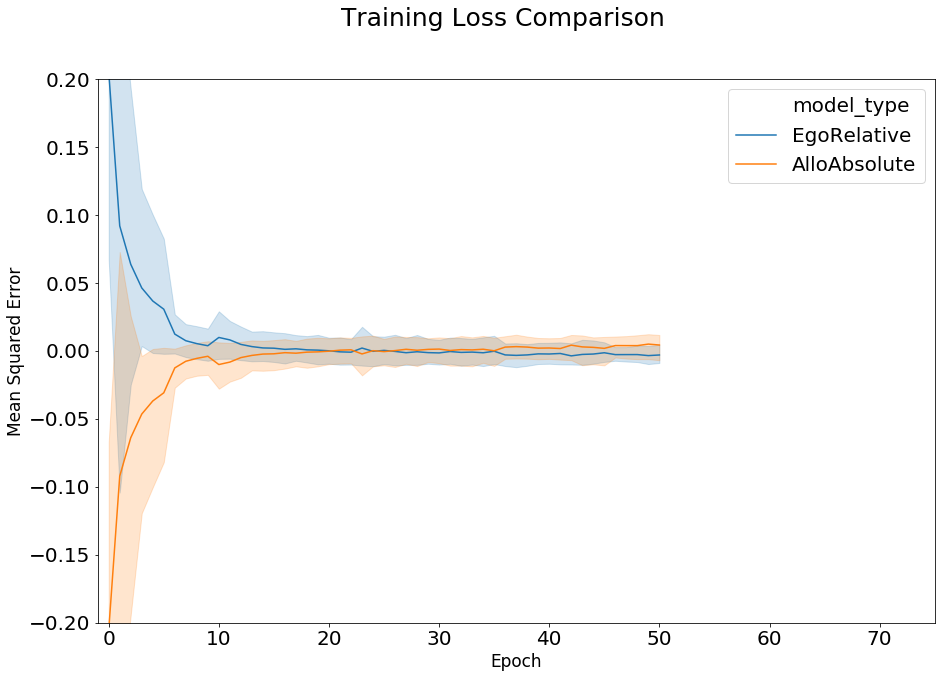

In [82]:
fig = plt.figure(figsize=(15,10))
sns.lineplot(x="epoch", 
             y="seed_deviation",
             hue=hue,
             data=seed_df,
             )
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylim([-.2,.2])
plt.xlim([-1,75])
plt.suptitle("Training Loss Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=17)
plt.xlabel("Epoch", fontsize=17)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

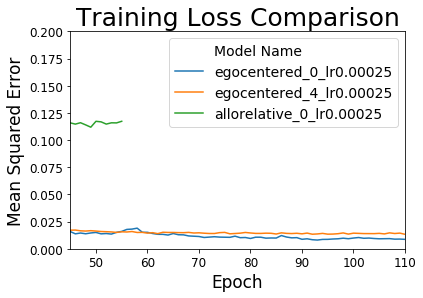

In [24]:
sns.lineplot(x="epoch", y="train_pred_loss",data=df,hue="Model Name")
plt.ylim([0,.2])
plt.xlim([45,110])
plt.title("Training Loss Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=17)
plt.xlabel("Epoch", fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

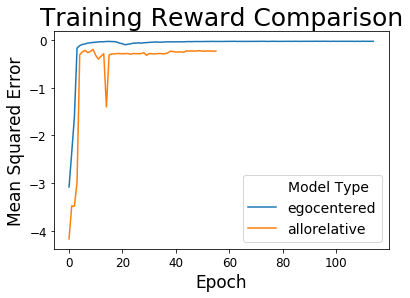

In [12]:
sns.lineplot(x="epoch", y="train_rew",data=comb_df,hue="Model Type")
plt.title("Training Reward Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=17)
plt.xlabel("Epoch", fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

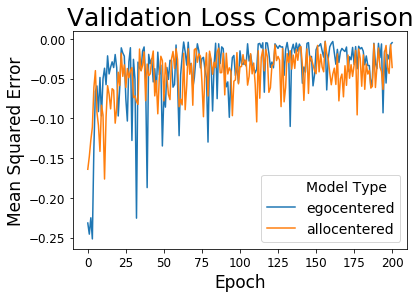

In [44]:
sns.lineplot(x="epoch", y="val_rew",data=comb_df,hue="Model Type")
plt.title("Validation Loss Comparison",fontsize=25)
plt.ylabel("Mean Squared Error",fontsize=17)
plt.xlabel("Epoch", fontsize=17)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=14)

## Debugging

In [25]:
models

['/home/grantsrb/src/locgame/training_scripts/search/search_0_egoCentered0_absoluteCoords0_seed0',
 '/home/grantsrb/src/locgame/training_scripts/search/search_1_egoCentered0_absoluteCoords0_seed1',
 '/home/grantsrb/src/locgame/training_scripts/search/search_2_egoCentered0_absoluteCoords1_seed0',
 '/home/grantsrb/src/locgame/training_scripts/search/search_3_egoCentered0_absoluteCoords1_seed1',
 '/home/grantsrb/src/locgame/training_scripts/search/search_4_egoCentered1_absoluteCoords0_seed0',
 '/home/grantsrb/src/locgame/training_scripts/search/search_5_egoCentered1_absoluteCoords0_seed1']

In [26]:
df1 = pd.read_csv(os.path.join(models[0],"model_data.csv"),sep="!")
df2 = pd.read_csv(os.path.join(models[4],"model_data.csv"),sep="!")

In [27]:
df1

,val_rew,epoch,train_rew_loss,train_rew,train_pred_loss,train_loss
0,-1.824651,0,3.409225,-1.910497,0.781136,1.043945
1,-0.471600,1,2.086273,-1.506832,0.624149,0.770362
2,-0.249342,2,0.510073,-0.455068,0.214749,0.244282
3,-0.453887,3,0.112379,-0.365530,0.178816,0.172173
4,-0.322803,4,0.099665,-0.319833,0.157690,0.151887
5,-0.280210,5,0.121590,-0.351927,0.173200,0.168039
6,-0.386837,6,0.060758,-0.266912,0.133421,0.126154
7,-0.311598,7,0.092057,-0.294112,0.146312,0.140887
8,-0.286130,8,0.130521,-0.288875,0.142251,0.141078
9,-0.220878,9,0.070640,-0.241544,0.120017,0.115079


In [28]:
df2

,val_rew,epoch,train_rew_loss,train_rew,train_pred_loss,train_loss
0,-0.699743,0,2.884135,-1.092956,0.464299,0.706282
1,-0.379654,1,0.282973,-0.408428,0.195035,0.203829
2,-0.278794,2,0.173270,-0.371474,0.180273,0.179572
3,-0.389712,3,0.101787,-0.315467,0.156022,0.150598
4,-0.317442,4,0.122804,-0.372359,0.183195,0.177156
5,-0.386597,5,0.046109,-0.264131,0.132032,0.123439
6,-0.159716,6,0.087388,-0.279273,0.138750,0.133614
7,-0.149181,7,0.048100,-0.241904,0.120895,0.113615
8,-0.447230,8,0.085830,-0.234257,0.116413,0.113355
9,-0.133449,9,0.072444,-0.223601,0.111077,0.107213
